<a href="https://colab.research.google.com/github/SansGangrade/6companies-30days-challenge/blob/main/my_CBOW_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://gist.github.com/jhumigas/fbd09c24ba1fe16f63dc078df011ebba

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [2]:
#Data Prepration
import re

In [3]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

Clean Data

Substitution (optional)
The re.sub(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them. The replacement string can include '\1', '\2' which refer to the text from group(1), group(2), and so on from the original matching text.



*   List item
*   List item



In [4]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

Vocabulary

In [25]:
#The split() method splits a string into a list.
words = sentences.split()
#converting the list into set of words called vocab
#Set items are unordered, unchangeable, and do not allow duplicate values.
vocab = set(words)

In [6]:
vocab_size = len(vocab)
# This the embedding space dimension, meaning we want to represent each word by a 10 dimensional
# vector. Thanks to this representation we will be computing the CBoW
embed_dim = 10
#We will be considering two words before and after the target
context_size = 2

Implementation 

In [7]:
# 1. Pre-process the dataset
# We associate each word to a unique index
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

Data bags

In [28]:
# Building our training set
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:6])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea'), (['the', 'idea', 'computational', 'process'], 'of')]


Embeddings

random.random_sample(size=None)

Return random floats in the half-open interval [0.0, 1.0).

Results are from the “continuous uniform” distribution over the stated interval. 

In [29]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

Linear Model

In [27]:
def linear(m, theta):
    w = theta
    return m.dot(w)

Log softmax + NLLloss = Cross Entropy

Softmax lets you convert the output from a Linear layer into a categorical probability distribution.
---



In [11]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [12]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [13]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

Forward function

In [14]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

Backward function

In [15]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

Optimize function

In [16]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

Training 

In [17]:
#Genrate training data

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [30]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Analyze 

Plot loss/epoch

Text(0, 0.5, 'Losses')

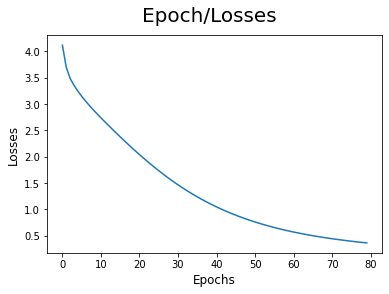

In [19]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

Predict function

In [20]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [ ]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

Accuracy

In [21]:
def accuracy():
    
            wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
    return (1 - (wrong / len(data)))

In [22]:
accuracy()

1.0

In [23]:
predict(['processes', 'manipulate', 'things', 'study'])

'other'